In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state (Geographic Area)

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [5]:
pr["City"].nunique()

24255

In [6]:
pr["Geographic Area"].nunique()

51

In [7]:
pr["City"].nunique()

24255

In [8]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
50.7       1
74.3       1
77.8       1
76.7       1
71.8       1
Name: poverty_rate, Length: 771, dtype: int64

In [9]:
pr[pr["poverty_rate"] == "-"]

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [10]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-1: replace the "-" with zero.**

In [11]:
pr["poverty_rate"] = pr["poverty_rate"].replace("-", "0")

In [12]:
pr.poverty_rate.value_counts()

0       1665
6.7      129
7.4      129
10.9     128
10       128
        ... 
50.7       1
74.3       1
77.8       1
76.7       1
71.8       1
Name: poverty_rate, Length: 770, dtype: int64

In [13]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [14]:
pr["poverty_rate"] = pr["poverty_rate"].astype(float) 

In [15]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [16]:
pr.poverty_rate.value_counts()

0.0     1665
6.7      129
7.4      129
10.9     128
10.0     128
        ... 
71.1       1
83.6       1
69.2       1
88.0       1
92.0       1
Name: poverty_rate, Length: 770, dtype: int64

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

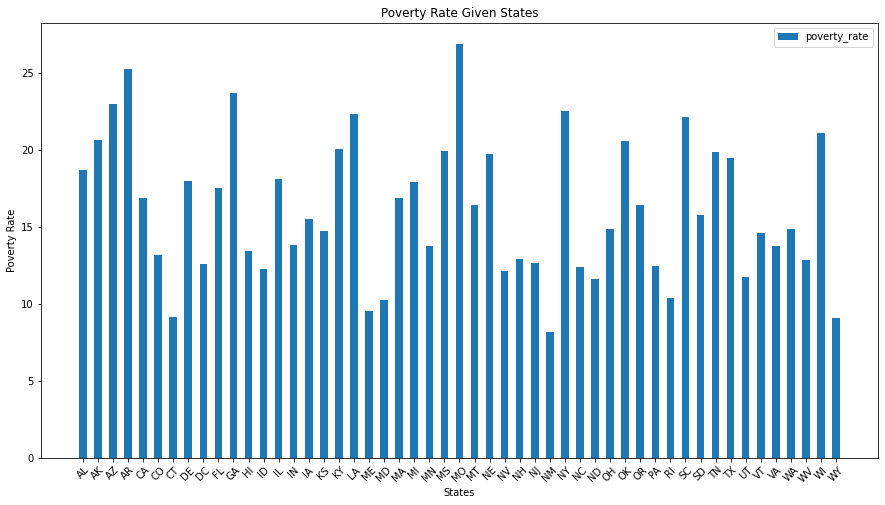

In [17]:
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(pr["Geographic Area"].unique(),pr.groupby("Geographic Area").poverty_rate.mean(),label="poverty_rate",width=0.5)
ax.set_xlabel("States")
ax.set_ylabel("Poverty Rate")
ax.set_xticks(pr["Geographic Area"].unique())
ax.set_xticklabels(pr["Geographic Area"].unique(),rotation=45)
ax.set_title("Poverty Rate Given States")
plt.legend();

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

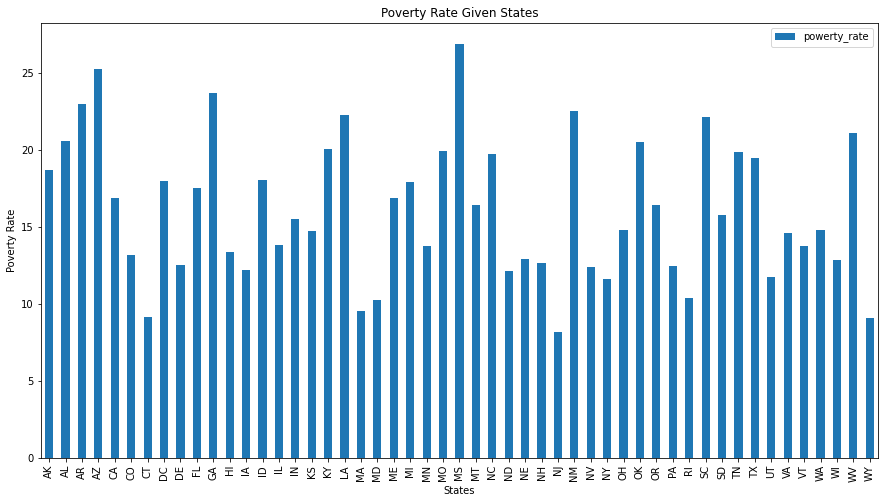

In [18]:
plt.figure(figsize=(15,8))
pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(label="powerty_rate")
plt.title("Poverty Rate Given States")
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.legend();

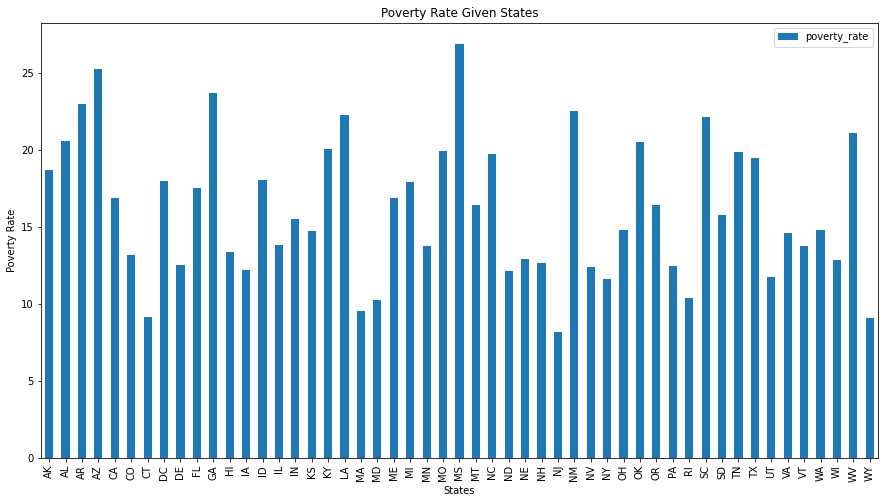

In [23]:
fig,ax = plt.subplots(figsize=(15,8))
pr.groupby("Geographic Area").poverty_rate.mean().plot.bar()
ax.set_xlabel("States")
ax.set_ylabel("Poverty Rate")
ax.set_title("Poverty Rate Given States")
plt.legend();

In [19]:
pr.groupby("Geographic Area").poverty_rate.mean().head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

In [20]:
pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).head()

Geographic Area
MS    26.884254
AZ    25.268071
GA    23.663636
AR    22.963216
NM    22.507675
Name: poverty_rate, dtype: float64

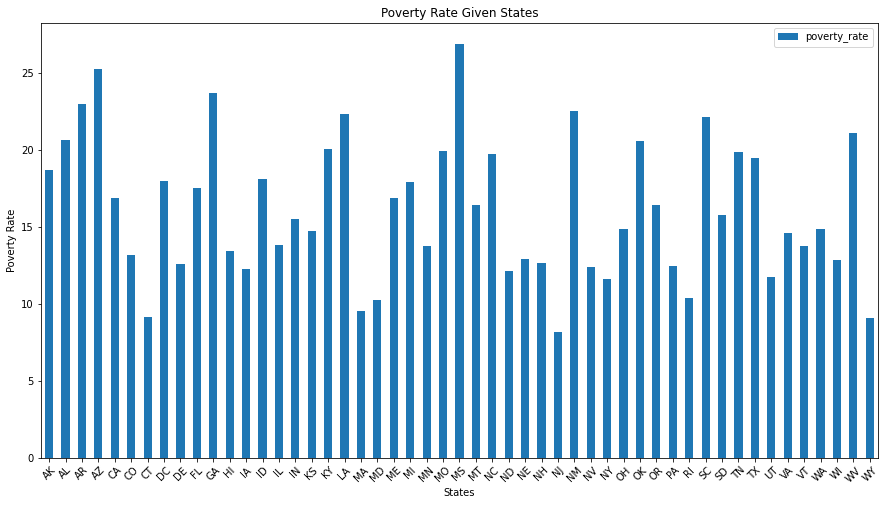

In [52]:
........

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

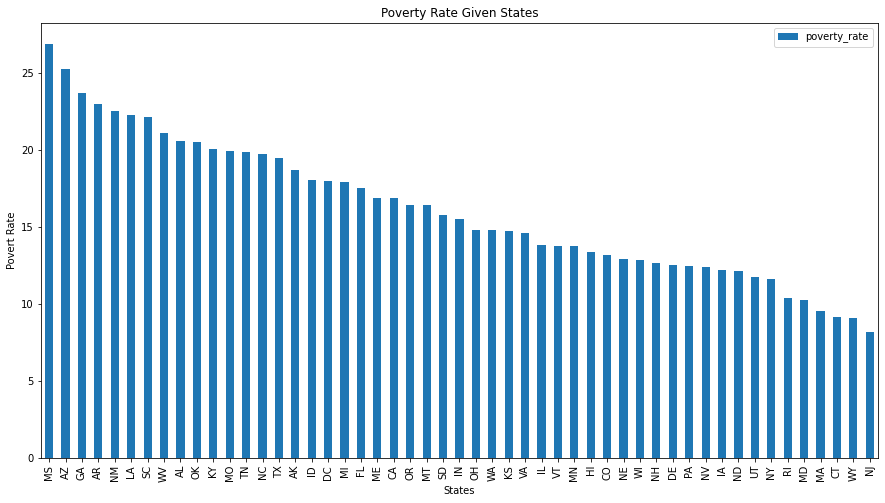

In [21]:
fig,ax = plt.subplots(figsize=(15,8))
pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).plot.bar()
ax.set_xlabel("States")
ax.set_ylabel("Povert Rate")
ax.set_title("Poverty Rate Given States")
plt.legend();

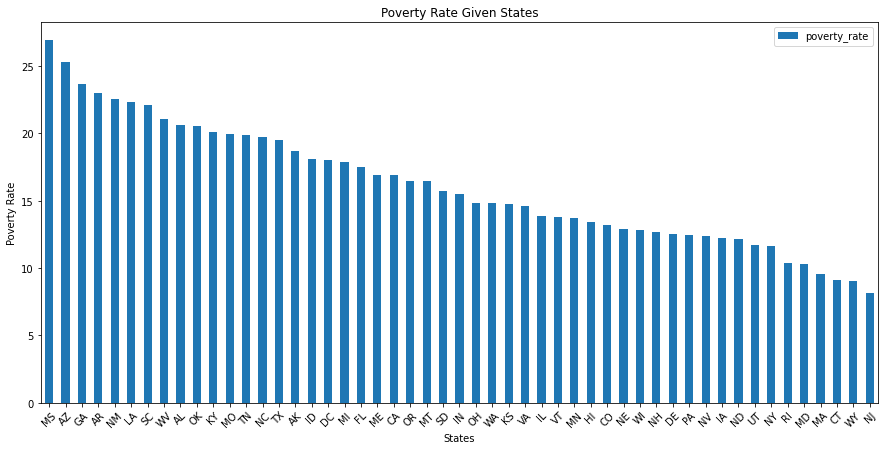

In [38]:
.........

**INSTRUCTION-3.b : Plot Sorted Values With Seaborn and set a green horizontal line on 20** 

In [22]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [25]:
labels=pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).index

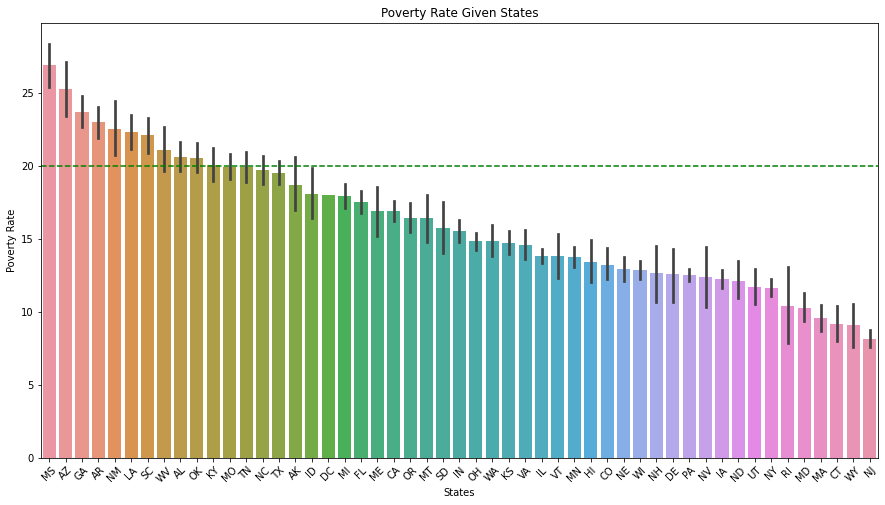

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x="Geographic Area", y="poverty_rate",data=pr, order=labels)
plt.title("Poverty Rate Given States")
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.xticks(rotation=45)
plt.axhline(y=20, color="green", ls="--");

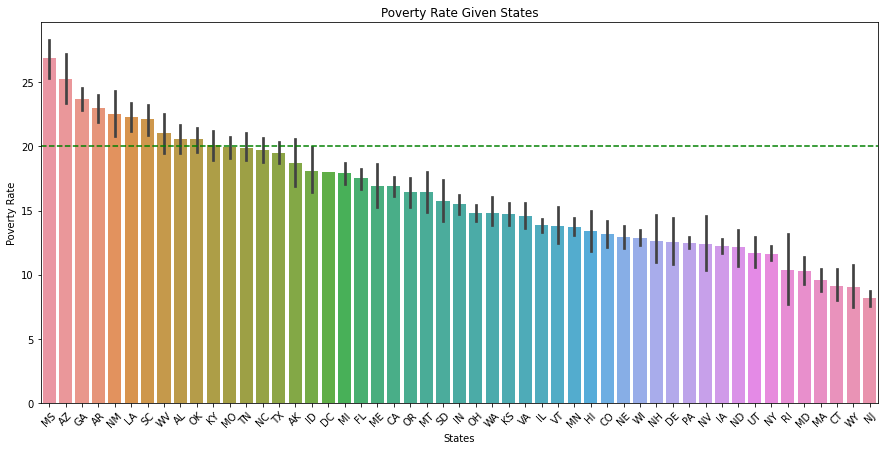

In [68]:
................

## 2. Most common 15 Name or Surname of killed people 

In [17]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
kill.shape

(2535, 14)

In [19]:
kill.name.value_counts()

TK TK                       49
Daquan Antonio Westbrook     2
TK Tk                        2
Michael Johnson              2
Brandon Jones                2
                            ..
Robert Keil                  1
Richard Munroe               1
Reginald McGregor            1
Michael Ferguson             1
Kenneth Garcia               1
Name: name, Length: 2481, dtype: int64

In [20]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [36]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

In [21]:
a = ["Tim", "Elliot", "Tim", "John", "Paul", "Quintero"]

In [22]:
Counter(a)

Counter({'Tim': 2, 'Elliot': 1, 'John': 1, 'Paul': 1, 'Quintero': 1})

In [23]:
all_list = []
for i in pairs:
    for j in i:
        all_list.append(j)
most_common_names = Counter(all_list)
most_common_names = most_common_names.most_common(15)
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [24]:
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [25]:
name, number = zip(*most_common_names)

In [26]:
name = list(name)

In [27]:
number = list(number)

In [ ]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.barplot(name,number,ax=ax)
# ax.set_xlabel("Name or Surname of Killed People")
# ax.set_ylabel("Frequency")
# ax.set_title("Most Common 15 Name or Surname");

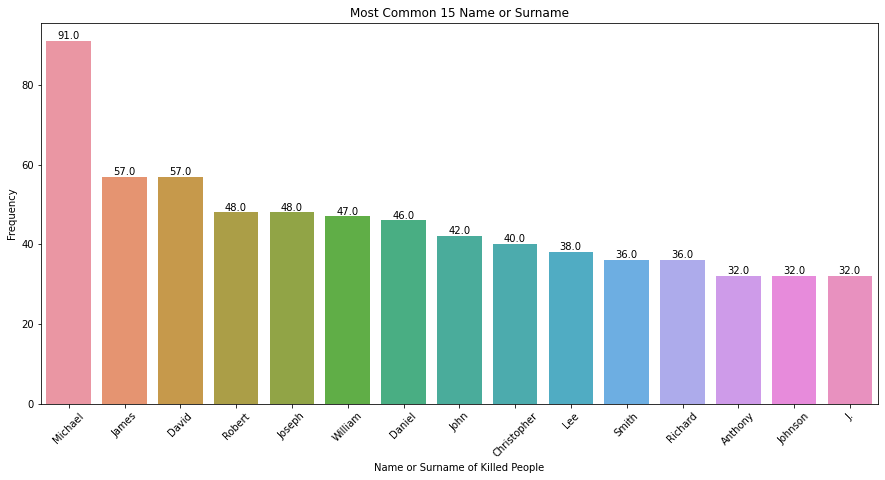

In [28]:
plt.figure(figsize=(15,7))
splot = sns.barplot(x=name, y=number)
plt.title("Most Common 15 Name or Surname")
plt.xlabel("Name or Surname of Killed People")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

for i in splot.patches:
    splot.annotate((i.get_height()), (i.get_x()+0.2, i.get_height()+0.5));

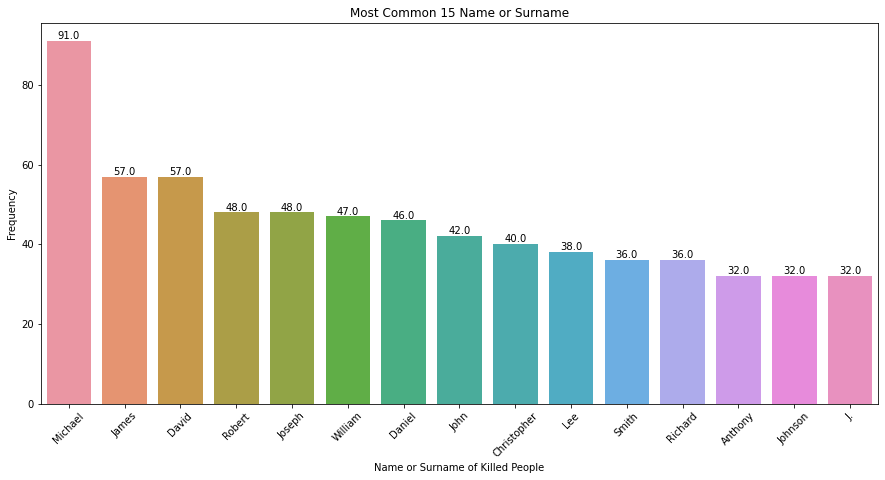

In [137]:
..................

## 3. Killed People According to Races (Pie Chart)

In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [30]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [31]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

In [33]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [39]:
kill.dropna(inplace=True)

In [40]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [41]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [44]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [45]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

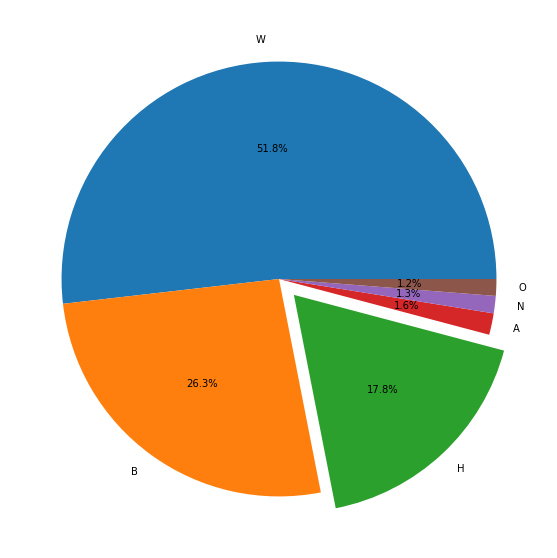

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
my_explode = (0,0,0.1,0,0,0)
ax.pie(sizes,labels=labels,autopct='%1.1f%%',explode=my_explode);

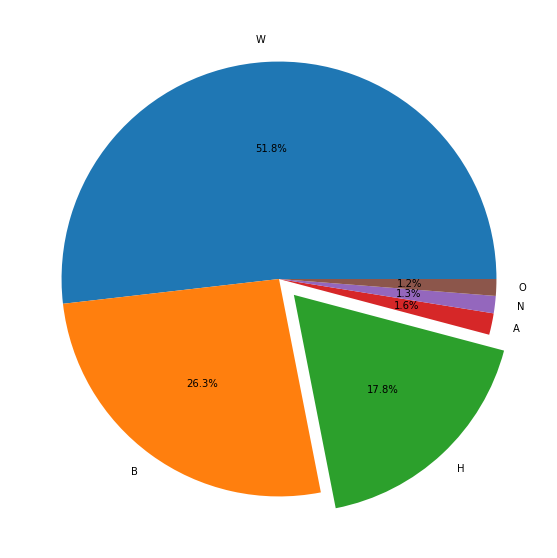

In [154]:
................

## 4a.Box plot of age in both genders separeted by manner of death.

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [52]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

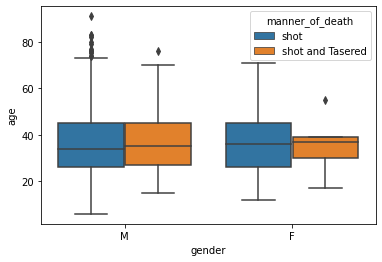

In [55]:
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death");

<AxesSubplot:xlabel='gender', ylabel='age'>

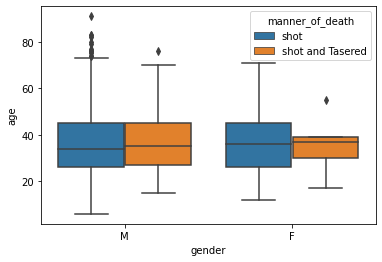

In [157]:
................

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

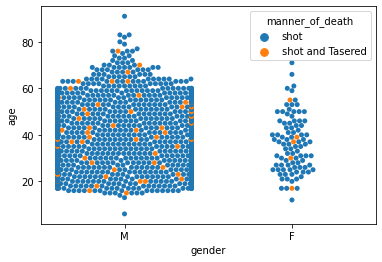

In [56]:
plt.figure(figsize=(6,4))
sns.swarmplot(x="gender", y="age", data=kill, hue="manner_of_death");

<AxesSubplot:xlabel='gender', ylabel='age'>

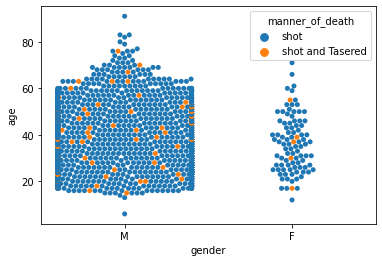

In [160]:
.............

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

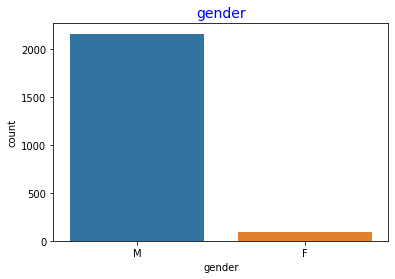

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender",data=kill)
plt.title("gender", color="blue", fontsize=14);

Text(0.5, 1.0, 'gender')

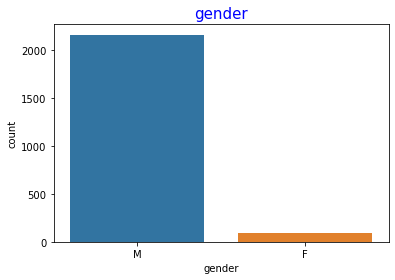

In [161]:
..........

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [163]:
kill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'metal rake', 'baton', 'crowbar',
       'oar', 'machete and gun', 'air conditioner', 'pole and knife',
       'beer bottle', 'pipe', 'baseba

In [66]:
kill.armed.value_counts().sort_values(ascending=False).head(7)

gun             1247
knife            324
unarmed          165
vehicle          158
toy weapon       102
undetermined      92
machete           16
Name: armed, dtype: int64

In [68]:
kill.armed.value_counts().sort_values(ascending=False).head(7).index

Index(['gun', 'knife', 'unarmed', 'vehicle', 'toy weapon', 'undetermined',
       'machete'],
      dtype='object')

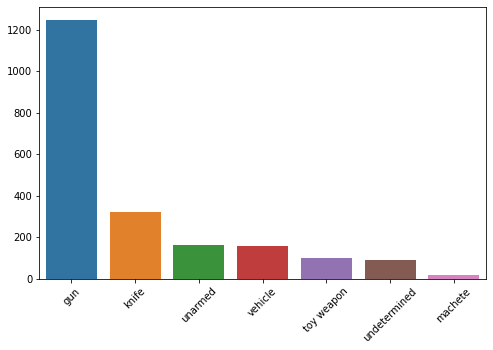

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=kill.armed.value_counts().sort_values(ascending=False).head(7).index, y=kill.armed.value_counts().sort_values(ascending=False).head(7))
plt.ylabel("")
plt.xticks(rotation=45);

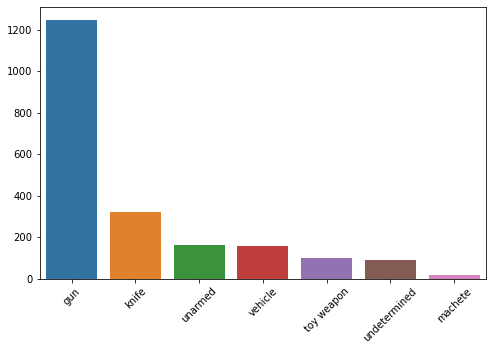

In [167]:
..........

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [107]:
above25 = kill[kill.age>25].age.value_counts().sum()

In [109]:
below25 = kill[kill.age<25].age.value_counts().sum()

In [110]:
above25

1737

In [111]:
below25

422

In [118]:
plt.figure(figsize=(6,4))
#age_cat = ["above25","below25"]
sns.caplot(x="below25");

ValueError: Could not interpret input 'below25'

<AxesSubplot:xlabel='age_cat', ylabel='count'>

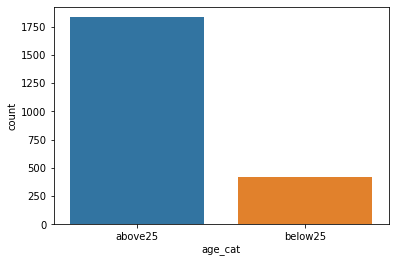

In [171]:
...........

**INSTRUCTION-4: Plot number of killed poeple by race**

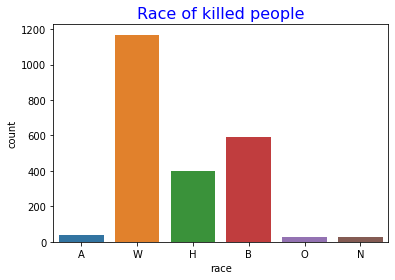

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(x="race", data=kill)
plt.title("Race of killed people", color="blue", fontsize=16);

Text(0.5, 1.0, 'Race of killed people')

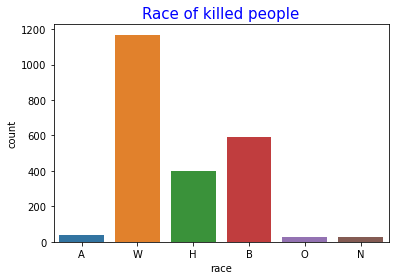

In [172]:
...........

In [129]:
kill.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

<AxesSubplot:xlabel='race', ylabel='count'>

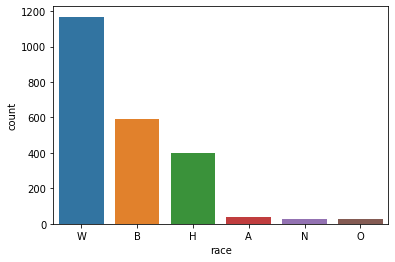

In [128]:
plt.figure(figsize=(6,4))
sns.countplot(x="race", data=kill, order=kill.race.value_counts().index)

<AxesSubplot:xlabel='race', ylabel='count'>

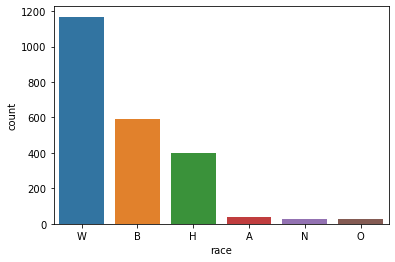

In [173]:
............

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [138]:
kill.groupby("city")["manner_of_death"].count().sort_values(ascending=False).head(12)

city
Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: manner_of_death, dtype: int64

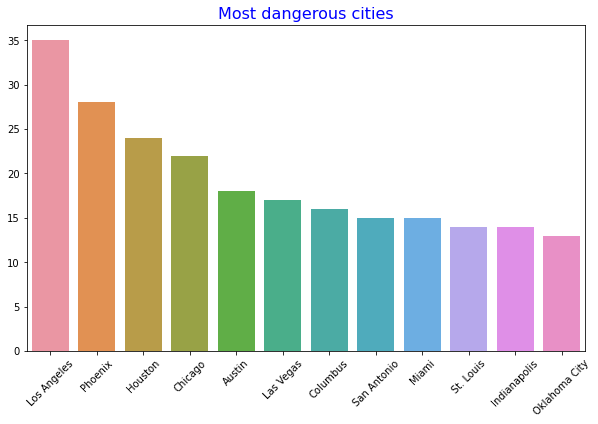

In [147]:
plt.figure(figsize=(10,6))
sns.barplot(x=kill.groupby("city")["manner_of_death"].count().sort_values(ascending=False).head(12).index, y=kill.groupby("city")["manner_of_death"].count().sort_values(ascending=False).head(12))
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.title("Most dangerous cities", color="blue", fontsize=16);

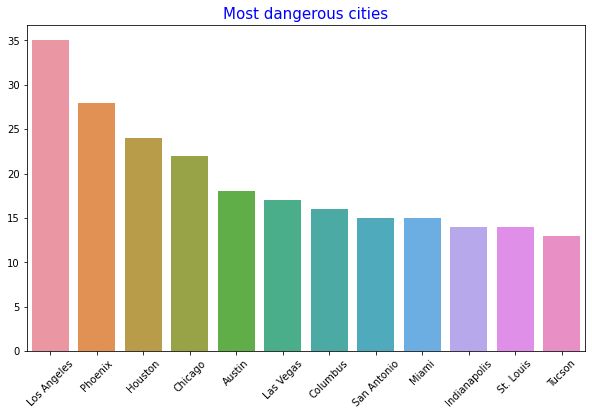

In [176]:
.............

**INSTRUCTION-6: Plot 20 most dangerous states**

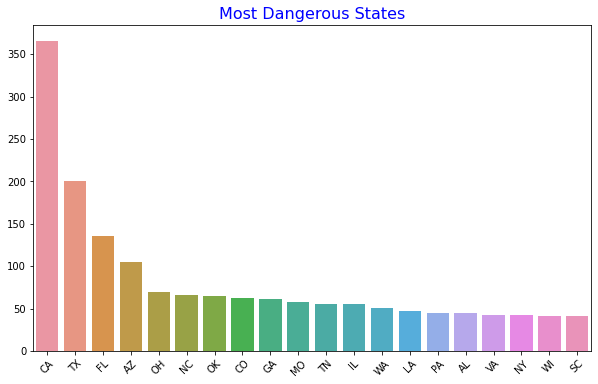

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(x=kill.groupby("state")["manner_of_death"].count().sort_values(ascending=False).head(20).index, y=kill.groupby("state")["manner_of_death"].count().sort_values(ascending=False).head(20))
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.title("Most Dangerous States", color="blue", fontsize=16);

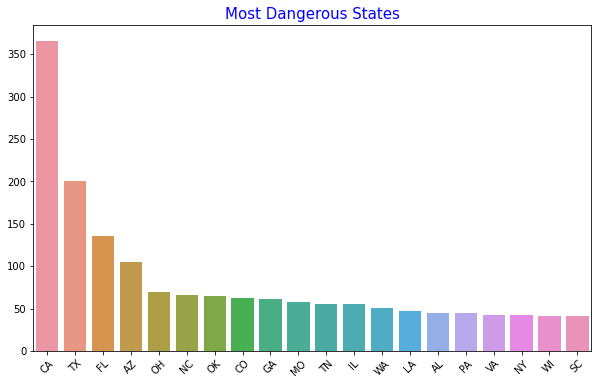

In [184]:
...........

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

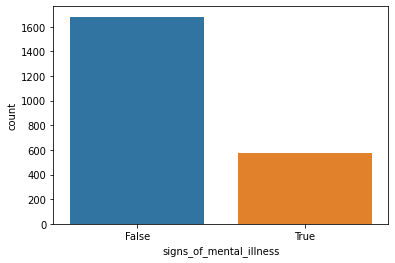

In [154]:
plt.figure(figsize=(6,4))
sns.countplot(x="signs_of_mental_illness", data=kill);

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

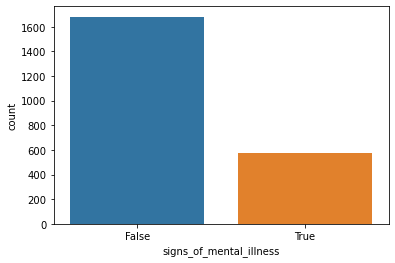

In [186]:
.............

**INSTRUCTION-8: Plot number of Threat Types**

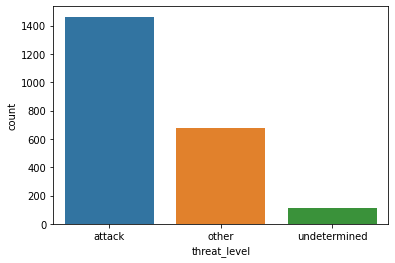

In [152]:
plt.figure(figsize=(6,4))
sns.countplot(x="threat_level", data=kill);

<AxesSubplot:xlabel='threat_level', ylabel='count'>

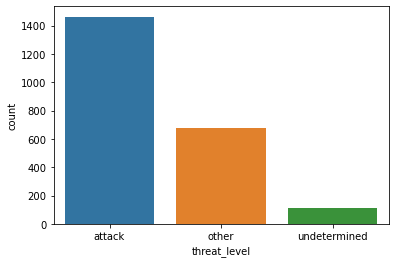

In [187]:
..........

**INSTRUCTION-9: Plot number of Flee Types**

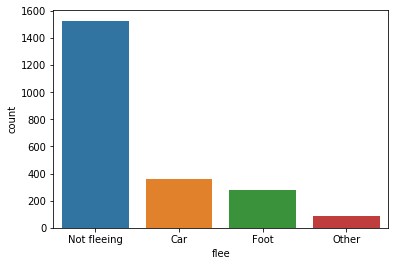

In [51]:
..........

In [149]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
